In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from sklearn.metrics import  classification_report
import warnings

In [3]:
warnings.simplefilter("ignore")

In [4]:
import pandas as pd 
import numpy as np 

In [5]:
train_images = pd.read_csv("D:/HPX/archive (11)/dataset/train/images.csv")

In [6]:
train_labels = pd.read_csv("D:/HPX/archive (11)/dataset/train/labels.csv")

In [7]:
val_images = pd.read_csv("D:/HPX/archive (11)/dataset/validation/images.csv")
val_labels = pd.read_csv("D:/HPX/archive (11)/dataset/validation/labels.csv")

In [8]:
train_images.head(5)

0.631373  0.623529  0.713726  0.705882  0.658824  0.666667  0.654902  \
0  0.725490  0.752941  0.749020  0.701961  0.690196  0.721569  0.709804   
1  0.717647  0.701961  0.713726  0.733333  0.705882  0.717647  0.725490   
2  0.705882  0.674510  0.654902  0.678431  0.666667  0.662745  0.678431   
3  0.647059  0.729412  0.701961  0.674510  0.611765  0.698039  0.713726   
4  0.694118  0.682353  0.705882  0.705882  0.666667  0.694118  0.674510   

   0.635294  0.647059  0.705882.1  ...  0.682353.349  0.611765.91  \
0  0.745098  0.654902    0.721569  ...      0.721569     0.698039   
1  0.682353  0.717647    0.674510  ...      0.709804     0.694118   
2  0.662745  0.686275    0.686275  ...      0.639216     0.662745   
3  0.662745  0.701961    0.674510  ...      0.639216     0.670588   
4  0.713726  0.690196    0.709804  ...      0.658824     0.698039   

   0.650980.397  0.658824.443  0.600000.48  0.603922.77  0.654902.426  \
0      0.721569      0.686275     0.713726     0.682353      0.690196   
1      0.705882      0.682353     0.639216     0.713726      0.670588   
2      0.631373      0.643137     0.705882     0.662745      0.705882   
3      0.705882      0.674510     0.721569     0.694118      0.674510   
4      0.694118      0.709804     0.725490     0.694118      0.729412   

   0.694118.222  0.658824.444  0.666667.441  
0      0.698039      0.701961      0.725490  
1      0.678431      0.737255      0.674510  
2      0.666667      0.654902      0.631373  
3      0.705882      0.749020      0.729412  
4      0.701961      0.694118      0.709804  

[5 rows x 8192 columns]

In [9]:
train_labels.head()

1.000000  0.000000  0.000000.1  0.000000.2
0       1.0       0.0         0.0         0.0
1       1.0       0.0         0.0         0.0
2       1.0       0.0         0.0         0.0
3       1.0       0.0         0.0         0.0
4       1.0       0.0         0.0         0.0

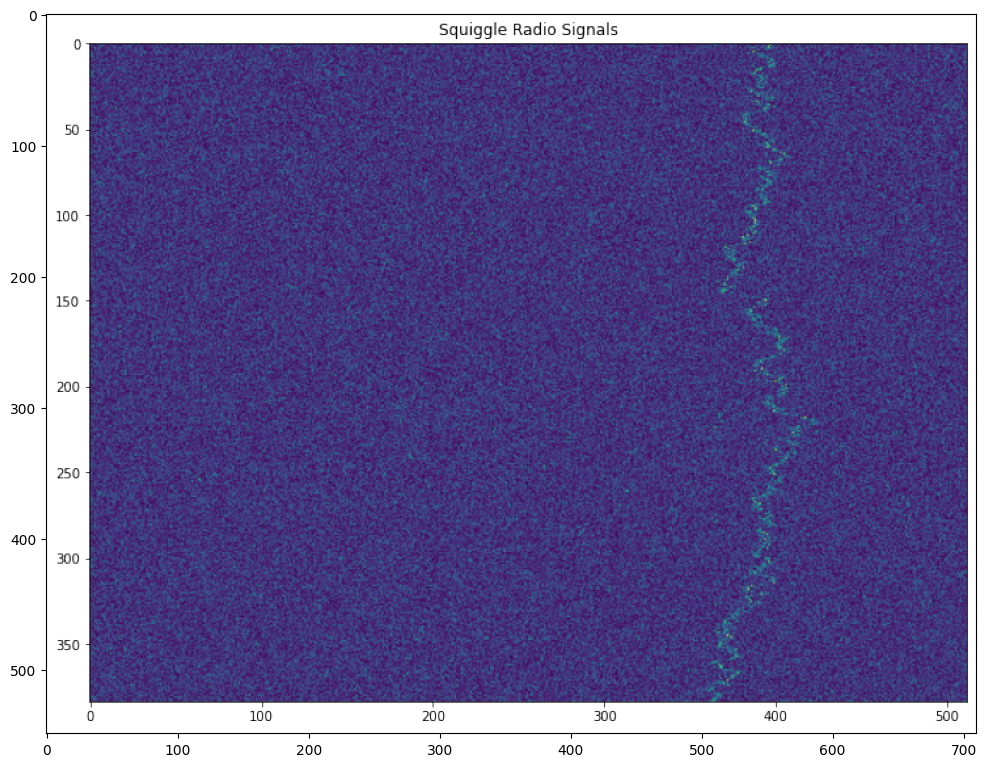

In [22]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("signal.png"))

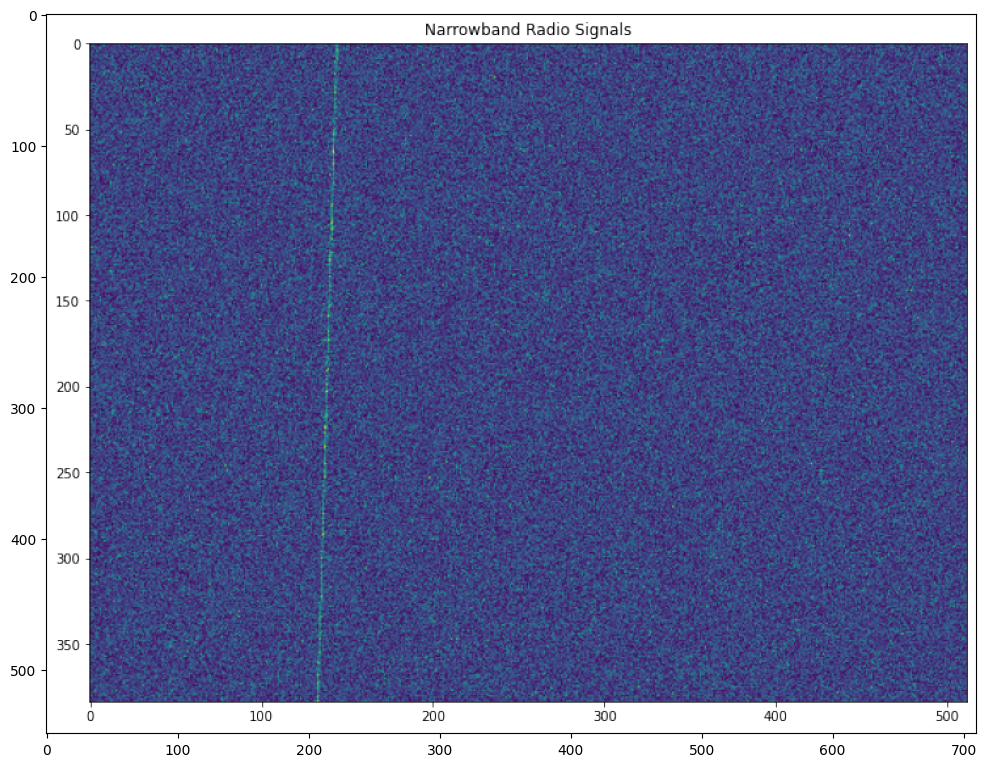

In [34]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("signal2.png"))

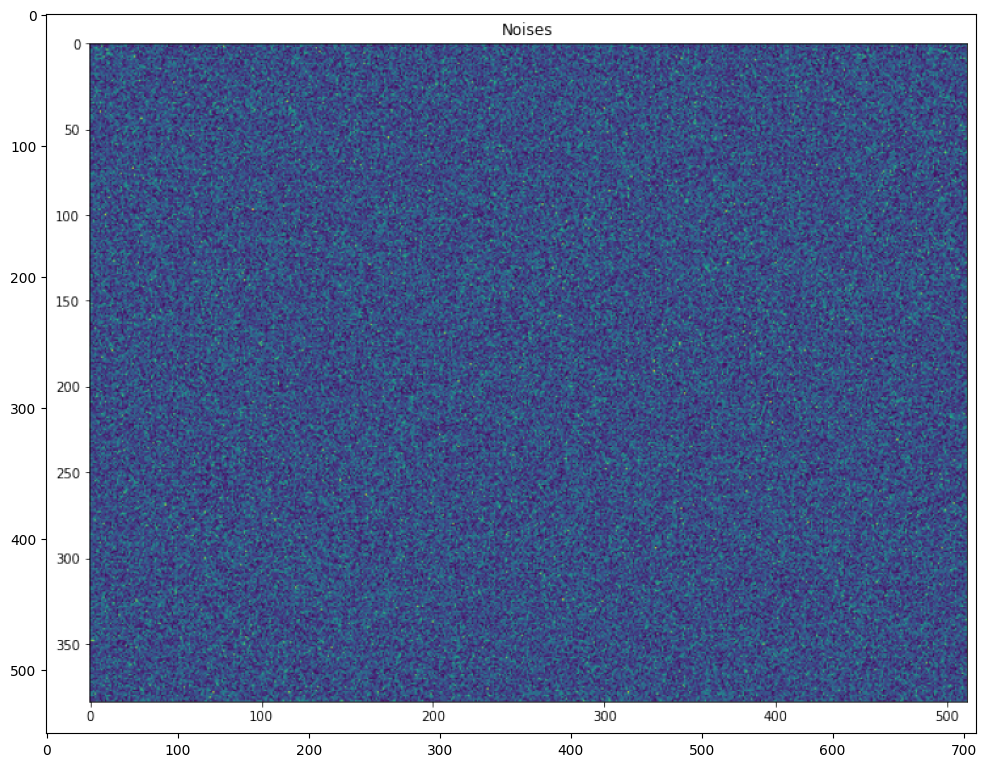

In [23]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("Noice.png"))

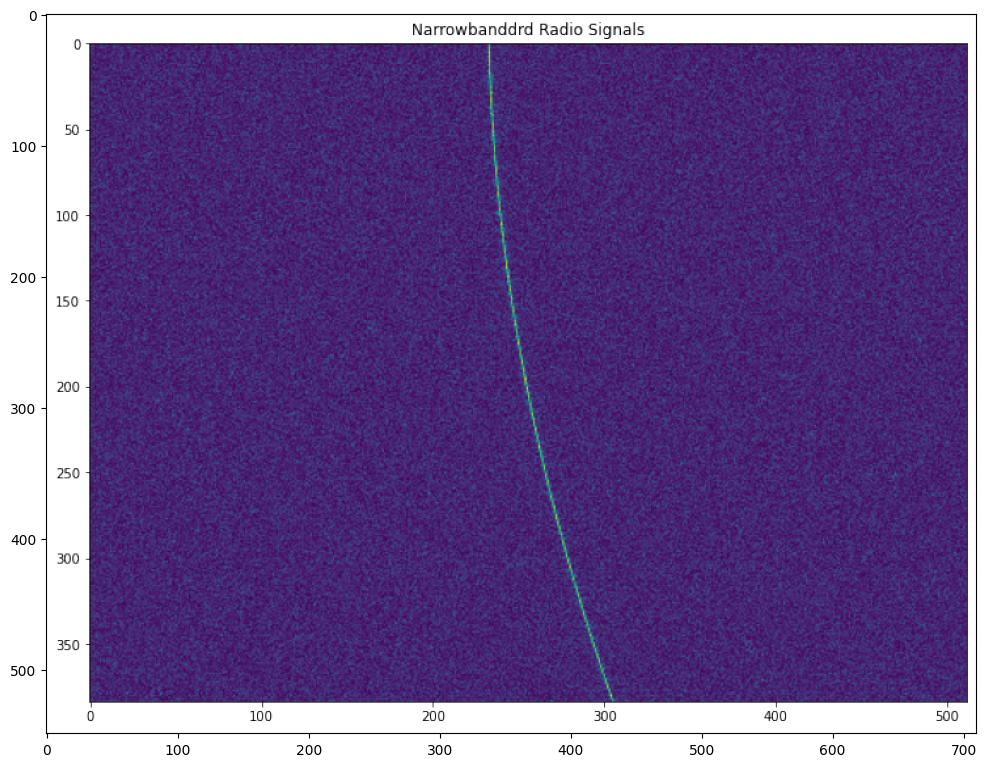

In [24]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("narrow.png"))

In [18]:
print("Training set Shape" , train_images.shape,train_labels.shape)

Training ser Shape (3199, 8192) (3199, 4)


In [19]:
print("Validation set Shape" , val_images.shape,val_labels.shape)

Validation set Shape (799, 8192) (799, 4)


In [27]:
x_tarin =train_images.values.reshape(3199,64,128,1)
x_test = val_images.values.reshape(799,64,128,1)
y_tarin = train_labels.values
y_test = val_labels.values
print(x_tarin.shape)
print(x_test.shape)
print(y_tarin.shape)
print(y_test.shape)

(3199, 64, 128, 1)
(799, 64, 128, 1)
(3199, 4)
(799, 4)


In [28]:
print(x_tarin.ndim)
print(x_test.ndim)
print(y_tarin.ndim)
print(y_test.ndim)

4
4
2
2


In [29]:
x_tarin[0]

array([[[0.72549 ],
        [0.752941],
        [0.74902 ],
        ...,
        [0.698039],
        [0.705882],
        [0.701961]],

       [[0.705882],
        [0.698039],
        [0.713726],
        ...,
        [0.686275],
        [0.694118],
        [0.745098]],

       [[0.643137],
        [0.682353],
        [0.690196],
        ...,
        [0.690196],
        [0.741176],
        [0.737255]],

       ...,

       [[0.721569],
        [0.709804],
        [0.709804],
        ...,
        [0.666667],
        [0.701961],
        [0.741176]],

       [[0.709804],
        [0.717647],
        [0.694118],
        ...,
        [0.713726],
        [0.713726],
        [0.709804]],

       [[0.705882],
        [0.67451 ],
        [0.733333],
        ...,
        [0.698039],
        [0.701961],
        [0.72549 ]]])

In [30]:
y_tarin[0]

array([1., 0., 0., 0.])

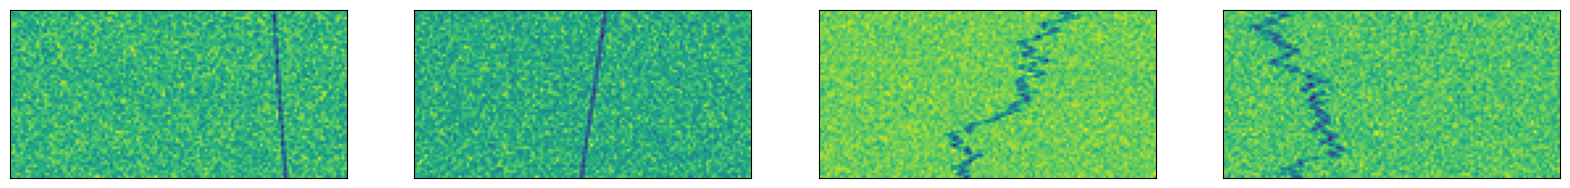

In [32]:
plt.figure(figsize=(20,15))
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tarin[np.random.randint(0,x_tarin.shape[0])])

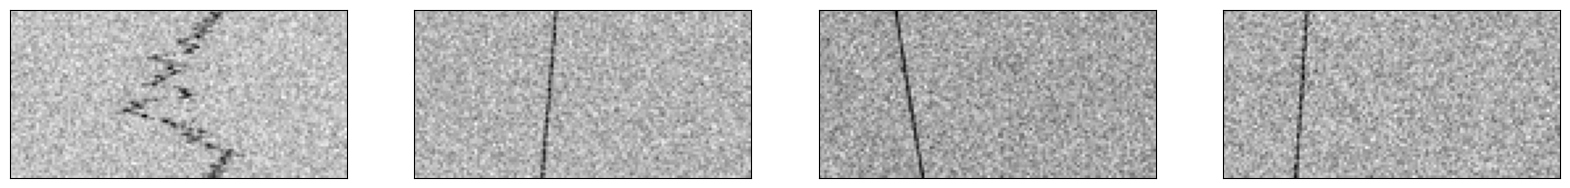

In [38]:
plt.figure(figsize=(20,15))
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tarin[np.random.randint(0,x_tarin.shape[0])],cmap="gray")

In [40]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
train_datagen = ImageDataGenerator(horizontal_flip=True)
test_datagen = ImageDataGenerator(horizontal_flip=True)
train_datagen.fit(x_tarin)
test_datagen.fit(x_test)

In [48]:
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import  Model,Sequential
# from tensorflow.keras.models import Adam,SGD 
from tensorflow.keras.callbacks import  ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.utils import plot_model

from keras.optimizers import SGD